# Amazon Book Reviews & Book Details 

### Little Shop around the corner is opening a new location and needs to select the best selection of books for its in store shelves. 

Data: 
    Utilizing two data sets the goal is to gain sentiment analysis based on genres and on individual books. 


Data: 
    Utilizing two data sets the goal is to gain sentiment analysis based on genres and on individual books. 

In [1]:
#Import Libraries for Data Preprocessing

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
import re

plt.style.use('ggplot')

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from spacy.lang.en.stop_words import STOP_WORDS


In [2]:
# More Libraries for visualization

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
from skimage import io
import missingno as msno
from wordcloud import WordCloud
from PIL import Image
import requests
from io import BytesIO

In [3]:
# Import Data Files

df_books = pd.read_csv('/Users/crystal.grant/Desktop/Data Science/Mini Project 3/books_data.csv')
df_reviews = pd.read_csv('/Users/crystal.grant/Desktop/Data Science/Mini Project 3/Books_rating.csv')

In [4]:
df_books.tail()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0
212403,Student's Solutions Manual for Johnson/Mowry's...,Discover the many ways mathematics is relevant...,"['David B. Johnson', 'Thomas A. Mowry']",http://books.google.com/books/content?id=dehfP...,http://books.google.com/books?id=dehfPgAACAAJ&...,Brooks/Cole Publishing Company,1998-01-01,http://books.google.com/books?id=dehfPgAACAAJ&...,NaN,NaN


In [5]:
df_reviews.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## EDA On Data 

- Goal: Identify missing values, drop unneccessary columns, join both files (necessary columns only)
- Perform Visualization to understand top genres and books utilizing scores and helpfulness of scores
- Prepare Data for data for Sentiment analysis then visualize the Sentiment analysis 


In [6]:
df_books.shape

(212404, 10)

In [7]:
df_reviews.shape

(3000000, 10)

In [9]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [9]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [10]:
df_reviews.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [11]:
df_books.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

In [12]:
#Check for missing values

df_reviews.isnull().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

<Axes: >

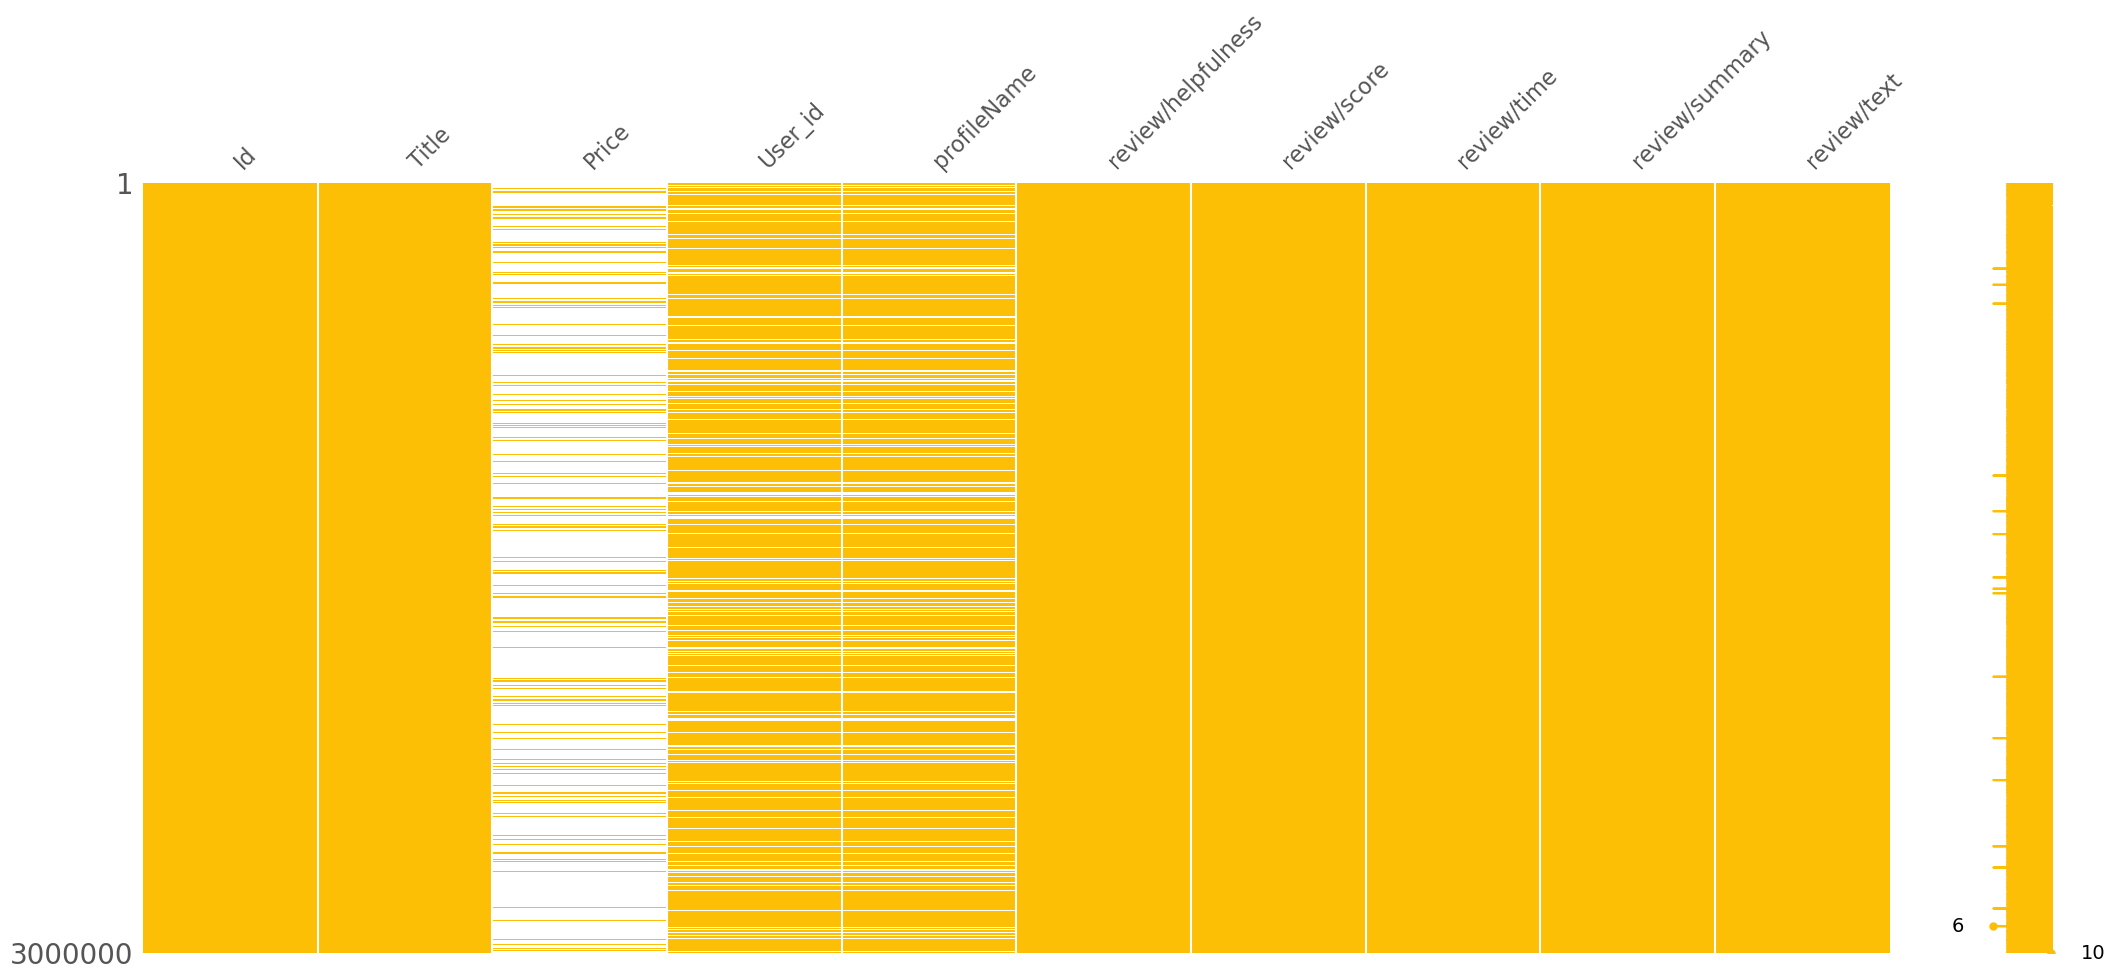

In [13]:
## Based on the results - Price is the most missed value but may be useful in later predictions

msno.matrix(df_reviews,color=(0.99, 0.75, 0.023))

In [14]:
df_books.isnull().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

<Axes: >

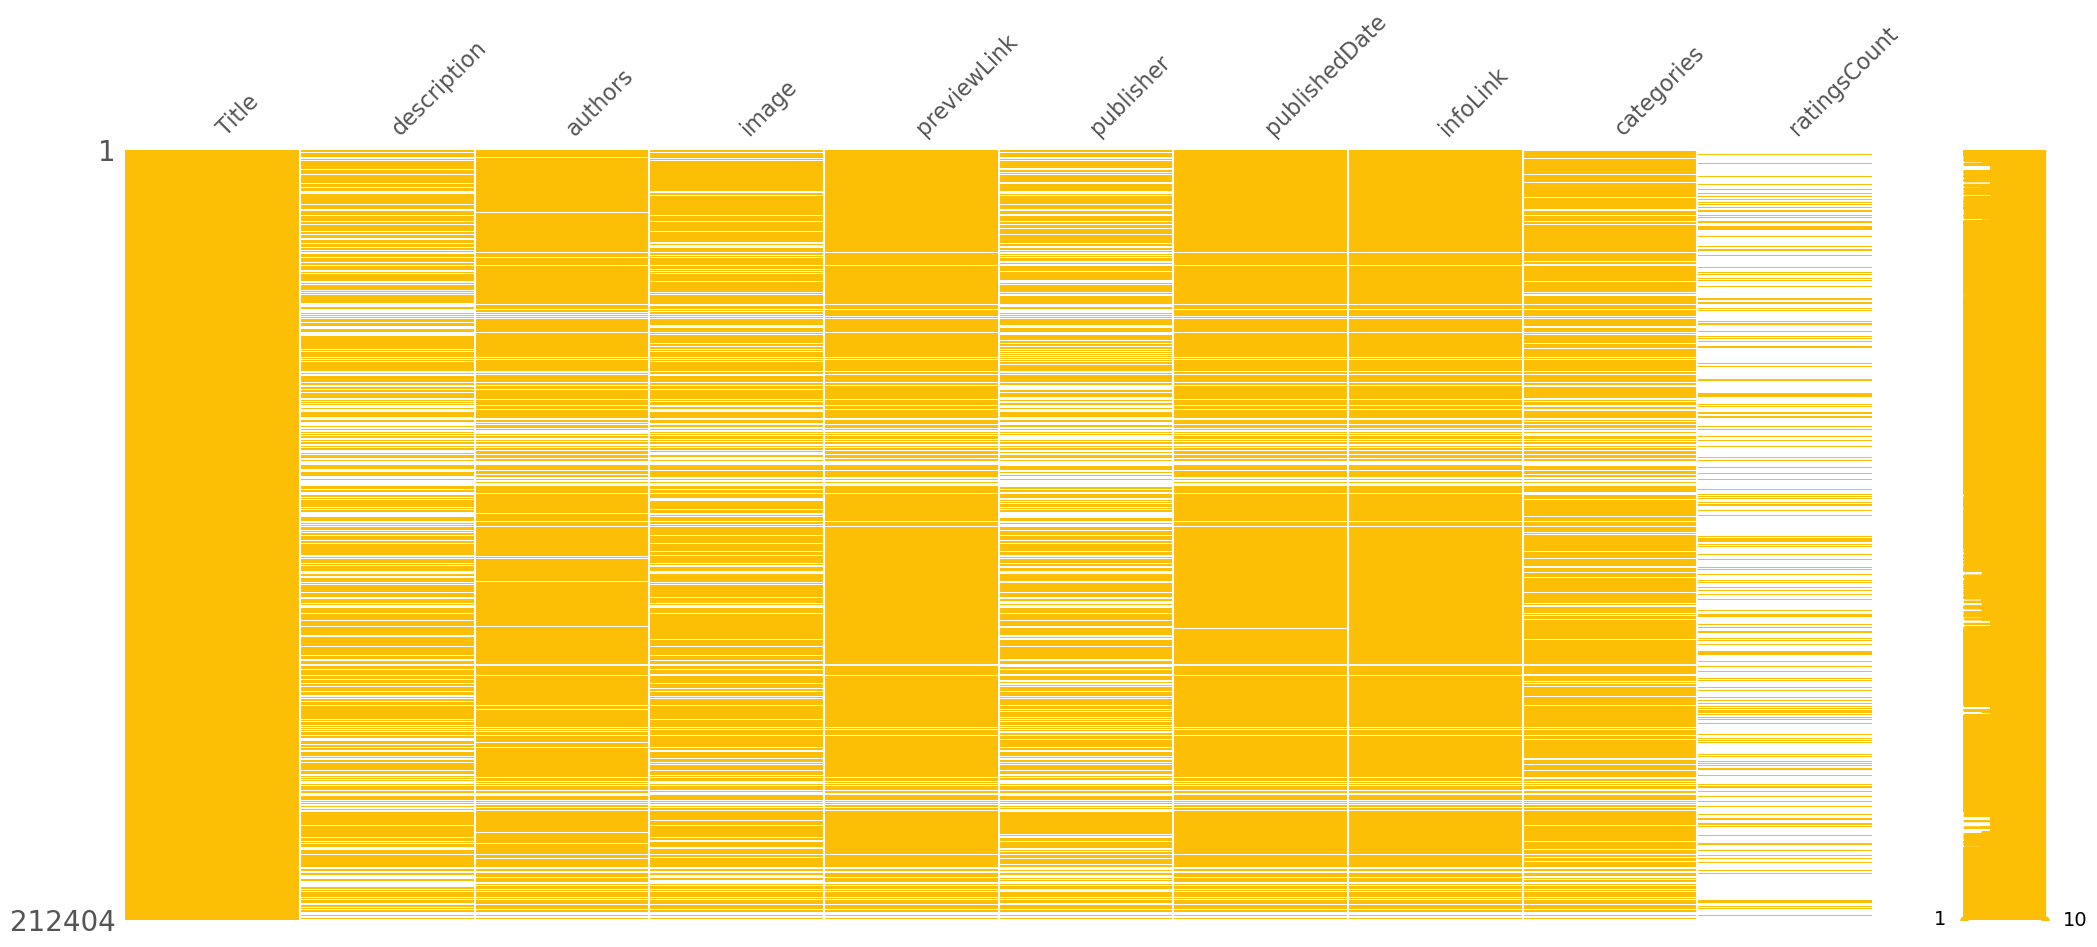

In [15]:
# Based on results - Most columns are missing data, but we are only interested in Title, description, and categories
msno.matrix(df_books,color=(0.99, 0.75, 0.023))

In [16]:
# Understanding Unique Values
print(f'Total Ids: {df_reviews.Id.count()}')
print(f'Total Unique Ids: {df_reviews.Id.nunique()}')
print(f'Total User Ids: {df_reviews.User_id.count()}')
print(f'Total Unique User Ids: {df_reviews.User_id.nunique()}')


Total Ids: 3000000
Total Unique Ids: 221998
Total User Ids: 2438213
Total Unique User Ids: 1008972


In [17]:
print(f'Total Titles in reviews: {df_reviews.Title.count()}')
print(f'Total Unique Titles in reviews: {df_reviews.Title.nunique()}')
print(f'Total Book Titles: {df_books.Title.count()}')
print(f'Total Unique Book Titles: {df_books.Title.nunique()}')

Total Titles in reviews: 2999792
Total Unique Titles in reviews: 212403
Total Book Titles: 212403
Total Unique Book Titles: 212403


In [18]:
# Understand distribution of ratings

colors = ['gold', 'mediumturquoise','brown']
labels = df_reviews['review/score'].value_counts().keys().map(str)
values = df_reviews['review/score'].value_counts()/df_reviews['review/score'].value_counts().shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))

fig.show()

In [19]:
# Top 50 books with most Reviews

user_per_book=df_reviews.groupby('Title')['User_id'].count()
user_per_book=user_per_book.sort_values(ascending = False)
fig = px.bar(user_per_book.head(50))
fig.show()

## Combine both Data sets to one Data Frame

In [4]:
#Combine the two datasets based on Title

book_reviews = pd.merge(df_books, df_reviews, on='Title', how='inner')

In [5]:
book_reviews.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,1882931173,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [6]:
book_reviews.shape

(3000000, 19)

In [7]:
#Understanding Null Values

book_reviews.isnull().sum()

Title                     208
description            640225
authors                390634
image                  540306
previewLink            330623
publisher              782617
publishedDate          354581
infoLink               330623
categories             551498
ratingsCount          1360694
Id                          0
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [8]:
#Drop Unnecessary Columns in new dataset
books_reviewed= book_reviews.drop(['image','previewLink','publisher','publishedDate','infoLink', 'User_id','review/time','description','profileName','ratingsCount'], axis=1)

books_reviewed.head()

,Title,authors,categories,Id,Price,review/helpfulness,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,['Julie Strain'],['Comics & Graphic Novels'],1882931173,NaN,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,['Philip Nel'],['Biography & Autobiography'],0826414346,NaN,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,['Philip Nel'],['Biography & Autobiography'],0826414346,NaN,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,['Philip Nel'],['Biography & Autobiography'],0826414346,NaN,7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,['Philip Nel'],['Biography & Autobiography'],0826414346,NaN,3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [9]:
books_reviewed.shape

(3000000, 9)

In [10]:
#Drop rows with missing values to reduce data set

books_reviewed.dropna(subset=['Title'], inplace=True)   
books_reviewed.dropna(subset=['categories'], inplace=True)
books_reviewed.dropna(subset=['review/text'], inplace=True)
books_reviewed.dropna(subset=['authors'], inplace=True)
books_reviewed.dropna(subset=['review/summary'], inplace=True)
books_reviewed.dropna(subset=['Price'], inplace=True)

In [11]:
books_reviewed.isnull().sum()

Title                 0
authors               0
categories            0
Id                    0
Price                 0
review/helpfulness    0
review/score          0
review/summary        0
review/text           0
dtype: int64

In [12]:
books_reviewed.shape

(393132, 9)

In [14]:
# Function to compute helpfulness ratio
def compute_helpfulness_ratio(helpfulness):
    try:
        numerator, denominator = map(int, helpfulness.split('/'))
        if denominator == 0:
            return 0  # Handle division by zero (0/0) as 0
        return numerator / denominator
    except ValueError:
        return 0  # Handle any unexpected format as 0

# Apply the function to create a new column for the helpfulness ratio
books_reviewed['helpfulness_ratio'] = books_reviewed['review/helpfulness'].apply(compute_helpfulness_ratio)

# Sort DataFrame by the helpfulness ratio in descending order
books_reviewed_sorted = books_reviewed.sort_values(by='helpfulness_ratio', ascending=False)

# Display the sorted DataFrame
books_reviewed_sorted.head()

,Title,authors,categories,Id,Price,review/helpfulness,review/score,review/summary,review/text,helpfulness_ratio
271004,Automatic Wealth: The Six Steps to Financial I...,['Michael Masterson'],['Business & Economics'],B000FGGLCK,2.99,2/1,5.0,Strategic Wealth Creation Guide for Mid-Lifers,"Masterson knows wealth creation, having done i...",2.0
1846723,Half of a Yellow Sun,['Chimamanda Ngozi Adichie'],['Fiction'],1400044162,26.95,52/52,5.0,But it is luminous like a full moon,Every novelist has a unique story simmering in...,1.0
2469014,Expert One-on-One Visual Basic .NET Business O...,['Rockford Lhotka'],['Computers'],1590591453,43.79,4/4,5.0,Highly-recommended book,I'm an MCSD with about six years of developmen...,1.0
2468879,The Rejection of Continental Drift: Theory and...,['Naomi Oreskes'],['Science'],0195117336,85.39,5/5,5.0,Thorough and Thoughtful; 4.5 stars,This thorough and well written books is a very...,1.0
2085312,Dead of Night (Hidden Faces Series #3),['Brandilyn Collins'],['Fiction'],0310251052,10.19,1/1,5.0,Buckle up!,I like taking my time with a good book - savor...,1.0


In [20]:
books_reviewed_sorted.shape

(393132, 10)

In [22]:
#Data set is too Large - 2000 books will be sufficient for analysis and pre-processing
#Keep only the top 2000 books with the highest helpfulness ratio, drop the rest and store as a new dataframe  called helpful_reviews

helpful_reviews = books_reviewed_sorted.head(2000)

helpful_reviews.shape

(2000, 10)

In [23]:
#Create new index for data set starting from 0  
helpful_reviews.reset_index(drop=True, inplace=True)

helpful_reviews.head()

,Title,authors,categories,Id,Price,review/helpfulness,review/score,review/summary,review/text,helpfulness_ratio
0,Automatic Wealth: The Six Steps to Financial I...,['Michael Masterson'],['Business & Economics'],B000FGGLCK,2.99,2/1,5.0,Strategic Wealth Creation Guide for Mid-Lifers,"Masterson knows wealth creation, having done i...",2.0
1,Half of a Yellow Sun,['Chimamanda Ngozi Adichie'],['Fiction'],1400044162,26.95,52/52,5.0,But it is luminous like a full moon,Every novelist has a unique story simmering in...,1.0
2,Expert One-on-One Visual Basic .NET Business O...,['Rockford Lhotka'],['Computers'],1590591453,43.79,4/4,5.0,Highly-recommended book,I'm an MCSD with about six years of developmen...,1.0
3,The Rejection of Continental Drift: Theory and...,['Naomi Oreskes'],['Science'],0195117336,85.39,5/5,5.0,Thorough and Thoughtful; 4.5 stars,This thorough and well written books is a very...,1.0
4,Dead of Night (Hidden Faces Series #3),['Brandilyn Collins'],['Fiction'],0310251052,10.19,1/1,5.0,Buckle up!,I like taking my time with a good book - savor...,1.0


In [24]:
# Create a new column 'index_column' with the index values
helpful_reviews['review_id'] = helpful_reviews.index

helpful_reviews.head()

,Title,authors,categories,Id,Price,review/helpfulness,review/score,review/summary,review/text,helpfulness_ratio,review_id
0,Automatic Wealth: The Six Steps to Financial I...,['Michael Masterson'],['Business & Economics'],B000FGGLCK,2.99,2/1,5.0,Strategic Wealth Creation Guide for Mid-Lifers,"Masterson knows wealth creation, having done i...",2.0,0
1,Half of a Yellow Sun,['Chimamanda Ngozi Adichie'],['Fiction'],1400044162,26.95,52/52,5.0,But it is luminous like a full moon,Every novelist has a unique story simmering in...,1.0,1
2,Expert One-on-One Visual Basic .NET Business O...,['Rockford Lhotka'],['Computers'],1590591453,43.79,4/4,5.0,Highly-recommended book,I'm an MCSD with about six years of developmen...,1.0,2
3,The Rejection of Continental Drift: Theory and...,['Naomi Oreskes'],['Science'],0195117336,85.39,5/5,5.0,Thorough and Thoughtful; 4.5 stars,This thorough and well written books is a very...,1.0,3
4,Dead of Night (Hidden Faces Series #3),['Brandilyn Collins'],['Fiction'],0310251052,10.19,1/1,5.0,Buckle up!,I like taking my time with a good book - savor...,1.0,4


In [25]:
#Drop Unnecessary Columns in new dataset - No longer need review/helpfulness, ID is not needed, and review text is not needed because it is too long to process without GPU

helpful_reviews = helpful_reviews.drop(['review/helpfulness', 'Id','review/text'], axis=1)

In [26]:
helpful_reviews.shape

(2000, 8)

## Pre-processing on text data 

- Tokenize the data 
- Remove stop words
- Perform Stemming and Lemmetization
- then utilize TD-IDF

In [27]:
#Import Libraries for Data Preprocessing
import string
%pip install contractions
import contractions
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('all')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/crystal.grant/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/crystal.grant/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/crystal.grant/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/crystal.grant/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/crystal.grant/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagg

True

In [28]:
#Data Preprocessing

def preprocess_text(text):
    # Ensure text is a string
    text = str(text)
    
    # Expand contractions
    text = contractions.fix(text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Apply the preprocessing function to the 'review/summary' column
helpful_reviews['review/summary'] = helpful_reviews['review/summary'].apply(preprocess_text)


## Data Visualization

In [29]:
# Number of unique Categories
print(f'Total Categories: {helpful_reviews.categories.count()}')
print(f'Total Unique Categories: {helpful_reviews.categories.nunique()}')

#print array of unique categories
helpful_reviews.categories.unique()

Total Categories: 2000
Total Unique Categories: 89


array(["['Business & Economics']", "['Fiction']", "['Computers']",
       "['Science']", "['History']", "['Nature']",
       "['Body, Mind & Spirit']", "['Literary Criticism']", "['Medical']",
       "['Transportation']", "['Self-Help']",
       "['Foreign Language Study']", "['Sports & Recreation']",
       "['Music']", "['Great Britain']", "['Poetry']", "['Religion']",
       "['Education']", "['Psychology']", "['Family & Relationships']",
       "['Emperors']", "['Bulimia']", "['Juvenile Nonfiction']",
       "['Social Science']", "['Biography & Autobiography']", "['Humor']",
       "['Philosophy']", "['Technology & Engineering']",
       "['Adventure stories']", "['Health & Fitness']",
       "['Employee management']", "['Cooking']",
       "['Young Adult Fiction']", "['Photography']",
       "['Political Science']", "['Language Arts & Disciplines']",
       "['Reference']", "['Drama']", "['Radio broadcasting']",
       "['Juvenile Fiction']", "['Bibles']", "['Mathematics']",
     

In [30]:
### Understanding the categories column and its unique values

import pandas as pd
import ipywidgets as widgets
from IPython.display import display


# Count occurrences of each unique value and sort from highest to lowest count
category_counts = helpful_reviews['categories'].value_counts()
sorted_categories = category_counts.sort_values(ascending=False)

# Convert the sorted categories and counts to a formatted string
categories_list_str = '\n'.join(f'{category}: {count}' for category, count in sorted_categories.items())

# Create and display the textarea widget
categories_list = widgets.Textarea(value=categories_list_str, layout=widgets.Layout(width='100%', height='400px'))
display(categories_list)

Textarea(value='[\'Fiction\']: 658\n[\'Religion\']: 168\n[\'Biography & Autobiography\']: 119\n[\'History\']: …

In [31]:
# Group by 'categories' and 'review_scores', and count the number of titles
category_review_counts = helpful_reviews.groupby(['categories', 'review/score']).size().reset_index(name='count')

# Create a bar chart
fig = px.bar(
    category_review_counts,
    x='categories',
    y='count',
    color='review/score',
    barmode='stack',  # Use 'group' for grouped bar chart
    labels={'count': 'Count of Titles', 'categories': 'Category', 'review_/score': 'Review Score'},
    title='Count of Titles in Each Category Based on Review Scores'
)

# Show the plot
fig.show()


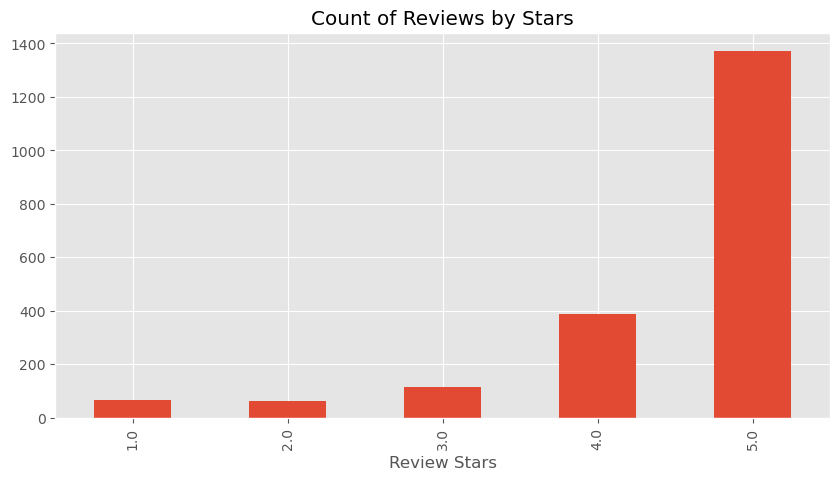

In [32]:
ax = helpful_reviews['review/score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()


## Begin Sentiment Analysis

    - Further Visualization to come

#Basic NLTK Text Preprocessing 

I will begin analysis on just one text field first - to understand which text field is best to use for analysis (Description, review/text, or review/summary)

- Vader Sentiment Scoring 
- Roberta Pretrained Model 
- Combine and Compare


#NLTK
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

Using "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.


In [33]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/crystal.grant/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [36]:
# Define Sentiment Analysis Function

def analyze_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    return 1 if score >= 0 else 0

# Apply the function to the 'review/summary' column
helpful_reviews['sentiment'] = helpful_reviews['review/summary'].apply(analyze_sentiment)

# Display the DataFrame
helpful_reviews.tail()

,Title,authors,categories,Price,review/score,review/summary,helpfulness_ratio,review_id,sentiment
1995,Euclid Earthmoving Equipment: 1924-1968 (A Pho...,['Eric C. Orlemann'],['Transportation'],49.95,5.0,great book,1.0,1995,1
1996,Shoulder the Sky (World War One Series),['Anne Perry'],['Fiction'],18.53,3.0,slogging trench warfare,1.0,1996,0
1997,Shoulder the Sky (World War One Series),['Anne Perry'],['Fiction'],18.53,2.0,slow second act,1.0,1997,1
1998,Shoulder the Sky (World War One Series),['Anne Perry'],['Fiction'],18.53,4.0,lest forget price paid freedom,1.0,1998,1
1999,WILL@epicqwest.com: A Medicated Memoir,['Tom Grimes'],['Fiction'],11.01,5.0,witty deadpan book hope,1.0,1999,1


## Begin Modeling
# Split The Data Set
    - Now that we have a clear Independent Variable we can begin running our Models

In [37]:
# Features and Labels
X = helpful_reviews['review/summary']
y = helpful_reviews['sentiment']

# Apply a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
# Add More Libraries

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

In [41]:
#Create a Bag Of Words Model

vectorizer = CountVectorizer()

A = vectorizer.fit_transform(X_train, y_train)

# create a classifier using SVC
classifier = SVC(kernel='linear', probability=True)

# train the classifier
classifier.fit(A.toarray(), y_train)

SVC(kernel='linear', probability=True)

In [45]:
# do the transformation for the test data
B = vectorizer.transform(X_test)

# make predictions based on the test data
predictions = classifier.predict(np.asarray(B.todense()))

# store probabilities of predictions being 1
probabilities = classifier.predict_proba(np.asarray(B.todense()))[:, 1]



In [46]:
# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.8950


In [48]:
## Will TF-IDF improve the accuracy of the model?

# create a matrix of word counts from the text
# use TF-IDF
tfidf = TfidfVectorizer()
# do the actual counting
A = tfidf.fit_transform(X_train, y_train)

# train the classifier with the training data
# Convert the sparse matrix B to a dense matrix
B_dense = B.toarray()

# Make predictions based on the dense matrix
predictions = classifier.predict(B_dense)


In [50]:

# store probabilities of predictions being 1
probabilities = classifier.predict_proba(np.asarray(B.todense()))[:, 1]

# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.8975


# Compare Vaders to Roberta Model

In [51]:
# Run the polarity score on the entire dataset - results will be stored in a dictionary called res for results
res = {}
for i, row in tqdm(helpful_reviews.iterrows(), total=len(helpful_reviews)):
    text = row['review/summary']
    myid = row['review_id']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/2000 [00:00<?, ?it/s]

In [52]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'review_id'})
vaders = vaders.merge(helpful_reviews, how='left')

In [53]:
#Sentiment scores and Original dataset

vaders.head()

,review_id,neg,neu,pos,compound,Title,authors,categories,Price,review/score,review/summary,helpfulness_ratio,sentiment
0,0,0.0,0.361,0.639,0.6486,Automatic Wealth: The Six Steps to Financial I...,['Michael Masterson'],['Business & Economics'],2.99,5.0,strategic wealth creation guide midlifers,2.0,1
1,1,0.0,0.545,0.455,0.3612,Half of a Yellow Sun,['Chimamanda Ngozi Adichie'],['Fiction'],26.95,5.0,luminous like full moon,1.0,1
2,2,0.0,1.000,0.000,0.0000,Expert One-on-One Visual Basic .NET Business O...,['Rockford Lhotka'],['Computers'],43.79,5.0,highlyrecommended book,1.0,1
3,3,0.0,0.536,0.464,0.3818,The Rejection of Continental Drift: Theory and...,['Naomi Oreskes'],['Science'],85.39,5.0,thorough thoughtful 45 star,1.0,1
4,4,0.0,1.000,0.000,0.0000,Dead of Night (Hidden Faces Series #3),['Brandilyn Collins'],['Fiction'],10.19,5.0,buckle,1.0,1


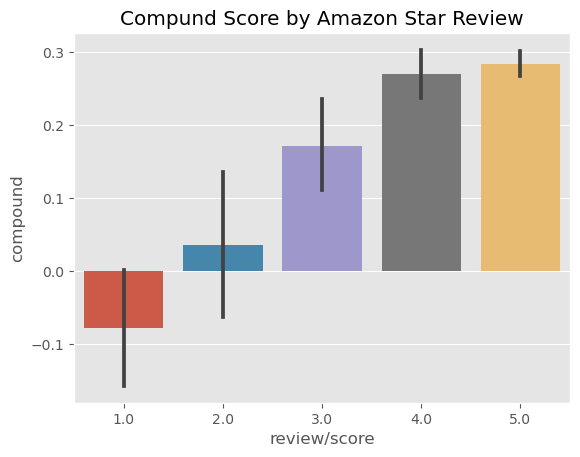

In [54]:
# Plot Vader Results

ax = sns.barplot(data=vaders, x='review/score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

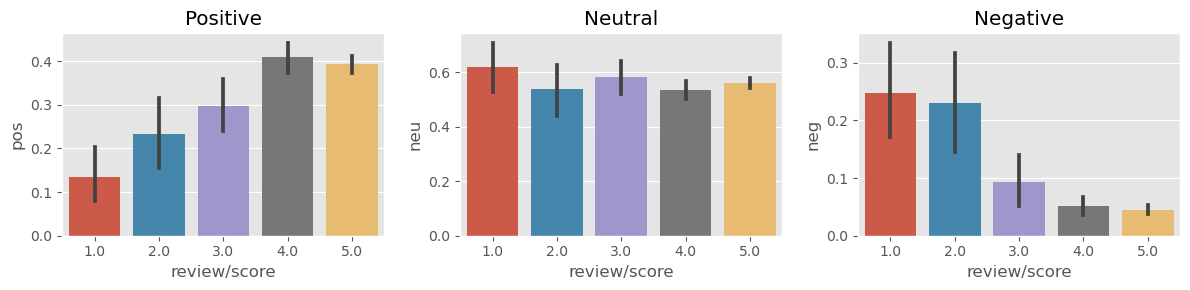

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='review/score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='review/score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='review/score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model
Use a model trained of a large corpus of data.


In [56]:
import transformers
import tensorflow as tf

print(tf.__version__)
print(transformers.__version__)

2.16.1
4.32.1


In [57]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
from transformers import TFAutoModelForSequenceClassification

# Model name
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"  # Ensure this is correct

try:
    # Attempt to load the model
    model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
    print("Model loaded successfully!")
except Exception as e:
    print(f"An error occurred: {e}")

# As a fallback, try loading a different model
try:
    fallback_model = "distilbert-base-uncased-finetuned-sst-2-english"
    model = TFAutoModelForSequenceClassification.from_pretrained(fallback_model)
    print("Fallback model loaded successfully!")
except Exception as e:
    print(f"An error occurred with the fallback model: {e}")

An error occurred: 'NoneType' object is not callable
An error occurred with the fallback model: 'NoneType' object is not callable


In [59]:
#do i have pytorch installed?
import torch
print(torch.__version__)

2.3.1


In [60]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [61]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [62]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [63]:
example = helpful_reviews['review/summary'][50]
print(example)

emotional book


In [64]:
# VADER results on example
print(example)
sia.polarity_scores(example)

emotional book


{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.1531}

In [65]:
# Run for Roberta Model
#Easy to see that the model is more accurate than VADER
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.08512899, 'roberta_neu': 0.79342216, 'roberta_pos': 0.121448815}


In [69]:
#Create function to run through all reviews

import torch.nn.functional as F

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    
    return scores_dict

In [70]:
# Vader results and Roberta results

res = {}
for i, row in tqdm(helpful_reviews.iterrows(), total=len(helpful_reviews)):
    try:
        text = row['review/summary']
        myid = row['review_id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/2000 [00:00<?, ?it/s]

In [72]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'review_id'})
results_df = results_df.merge(helpful_reviews, how='left')

In [73]:
results_df.columns

Index(['review_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Title', 'authors',
       'categories', 'Price', 'review/score', 'review/summary',
       'helpfulness_ratio', 'sentiment'],
      dtype='object')

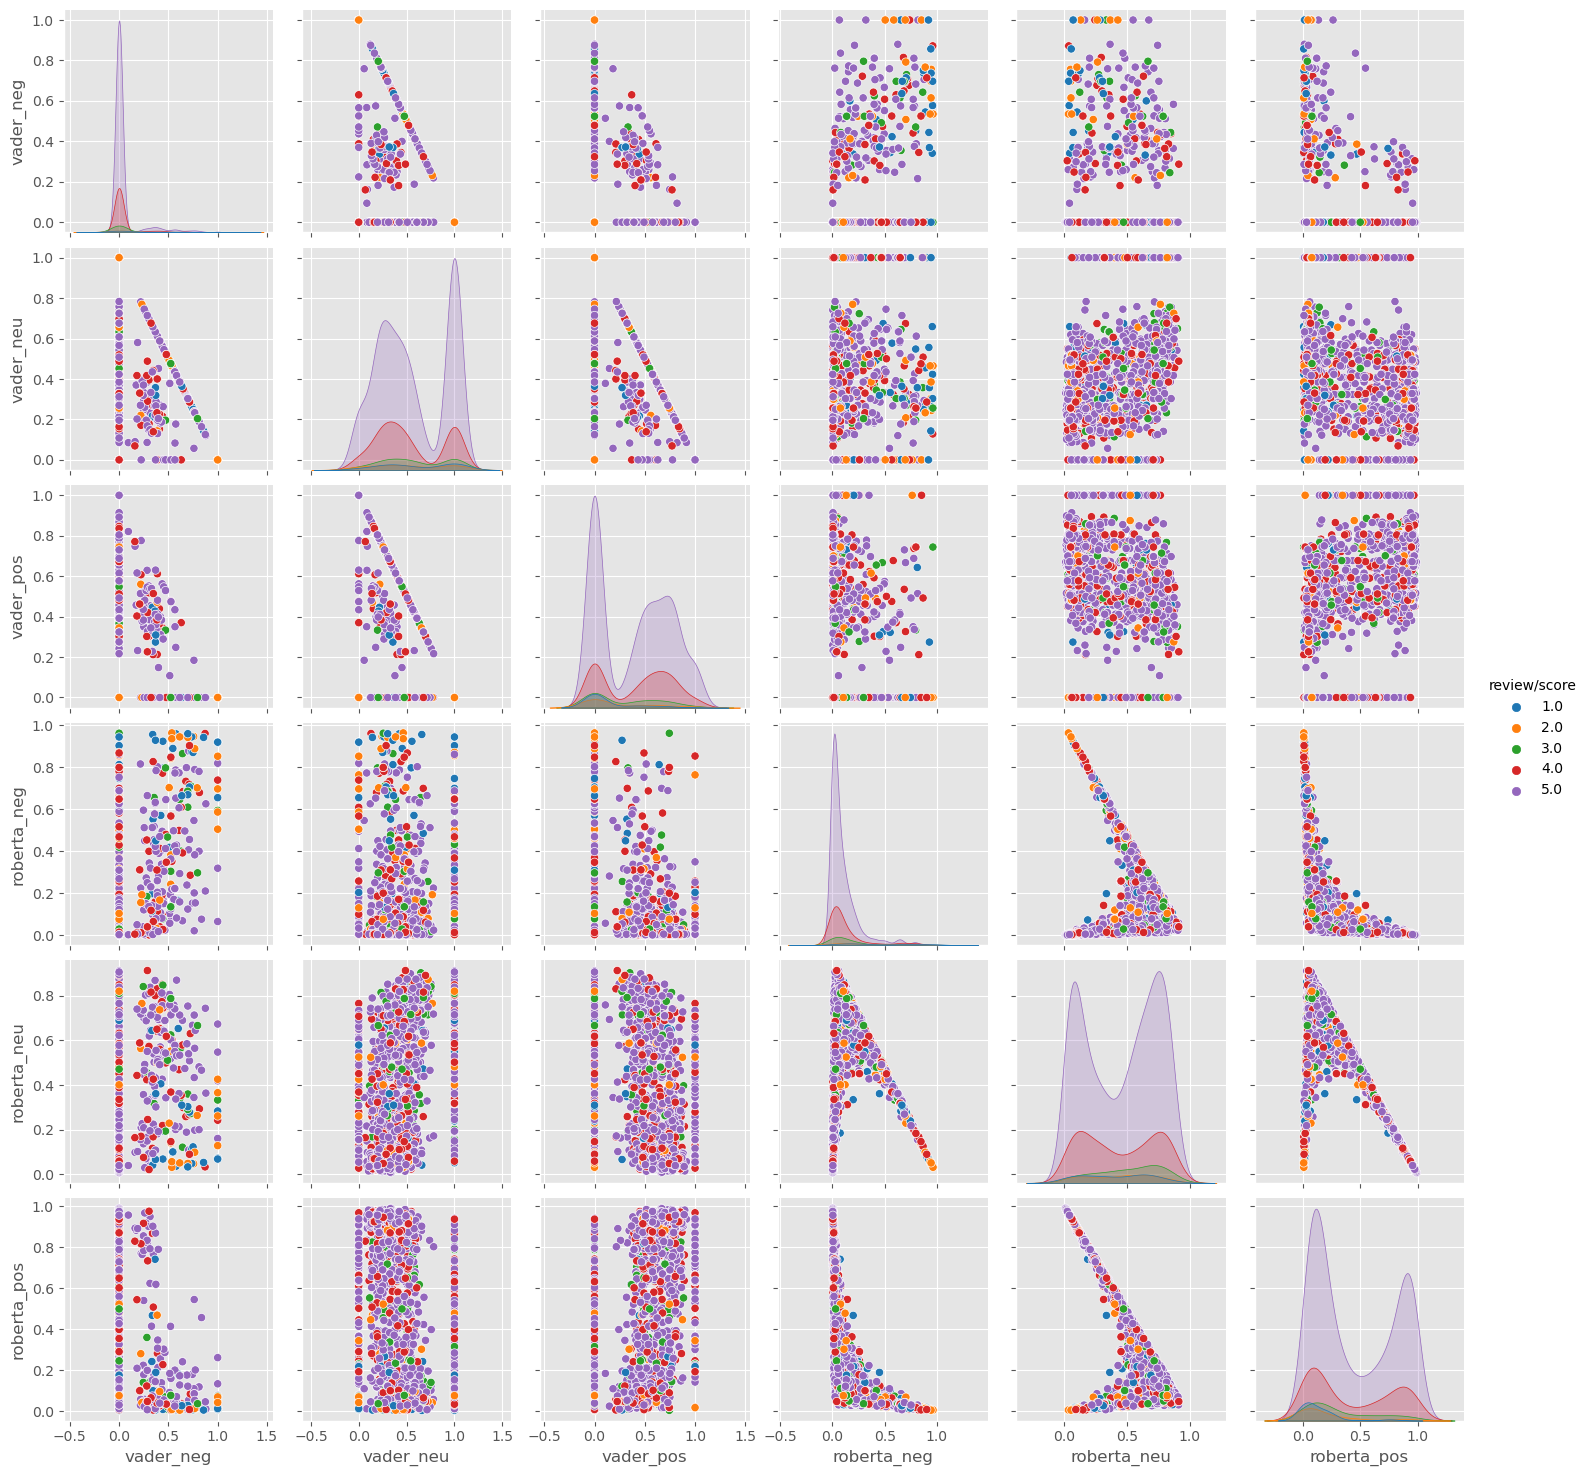

In [74]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='review/score',
            palette='tab10')
plt.show()

Review The Examples and Compare Vader to Roberta

In [76]:
results_df.query('`review/score` == 1.0') \
    .sort_values('roberta_pos', ascending=False)['review/summary'].values[0]

'raising teenager 52 brilliant idea'

In [77]:
results_df.query('`review/score` == 1') \
    .sort_values('vader_pos', ascending=False)['review/summary'].values[0]

'spark'

In [78]:
# nevative sentiment 5-Star view

results_df.query('`review/score` == 5.0') \
    .sort_values('roberta_neg', ascending=False)['review/summary'].values[0]

'damning thorough'

In [79]:
results_df.query('`review/score` == 5.0') \
    .sort_values('vader_neg', ascending=False)['review/summary'].values[0]

'heartbreaking'

## Logistic Regression Model


In [80]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(solver='lbfgs', random_state=42)
classifier



LogisticRegression(random_state=42)

In [82]:
# Train the Data - It was already split

classifier.fit(A.toarray(), y_train)

LogisticRegression(random_state=42)

In [83]:
#Score the Model

predictions = classifier.predict(B.toarray())
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8825


In [86]:
# Make Predictions

predictions = classifier.predict(B.toarray())
pd.DataFrame({"Predictions": predictions, "Actual": y_test}).head(20)

,Predictions,Actual
1860,1,1
353,1,1
1333,1,1
905,1,1
1289,1,1
1273,1,1
938,1,0
1731,1,1
65,1,1
1323,1,1


## Naive Bayes Classifier

In [105]:
#Import Libraries
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [106]:
#Create a Naive Bayes Model - Multinomial
# Using previously Vectorized Data

clf = naive_bayes.MultinomialNB()
clf.fit(A, y_train)

MultinomialNB()

In [107]:
roc_auc_score(y_test, clf.predict(B))


0.5

## 3 Versions of Naive Bayes - Multinomial, Comlement & SVC
 - Utilize the text features to predict categories 

In [108]:
# Vectorize the 'review/summary' column
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(helpful_reviews['review/summary'])


In [111]:
# Encode the 'categories' column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(helpful_reviews['categories'])


In [112]:
#Split Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [121]:
# Train a Linear SVC model
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)

# Predict on test data
y_pred_svc = svc_model.predict(X_test)

# Evaluate the model
print("\nLinear SVC Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))




Linear SVC Model
Accuracy: 0.3975


In [123]:
# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Model")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Model
Accuracy: 0.36


In [119]:
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_, labels=label_encoder.transform(label_encoder.classes_)))


                                           precision    recall  f1-score   support

                   ["Children's stories"]       0.00      0.00      0.00         1
                     ['Academic writing']       0.00      0.00      0.00         1
              ['Administrative agencies']       0.00      0.00      0.00         0
                    ['Adventure stories']       0.00      0.00      0.00         1
                               ['Africa']       0.00      0.00      0.00         1
                     ['American fiction']       0.00      0.00      0.00         0
                  ['American literature']       0.00      0.00      0.00         1
               ['American wit and humor']       0.00      0.00      0.00         3
              ['Antiques & Collectibles']       0.00      0.00      0.00         0
                         ['Architecture']       0.00      0.00      0.00         0
                                  ['Art']       0.00      0.00      0.00         2
   

## Naive Bayes to Predict Sentiment


In [113]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC


In [133]:
# Features and Labels
X = helpful_reviews['review/summary']
y = helpful_reviews['sentiment']

# Apply a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [134]:
pipeMNB = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])
pipeCNB = Pipeline([('tfidf', TfidfVectorizer()), ('clf', ComplementNB())])
pipeSVC = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])


In [128]:
# Fit the models  
pipeMNB.fit(X_train, y_train)
predictMNB = pipeMNB.predict(X_test) 
#Score the Model
print(f"MNB: {accuracy_score(y_test, predictMNB):.2f}")

# Fit the models  
pipeCNB.fit(X_train, y_train)
predictCNB = pipeCNB.predict(X_test) 
#Score the Model
print(f"CNB: {accuracy_score(y_test, predictCNB):.2f}")

# Fit the models  
pipeSVC.fit(X_train, y_train)
predictSVC = pipeSVC.predict(X_test) 
#Score the Model
print(f"SVC: {accuracy_score(y_test, predictSVC):.2f}")

MNB: 0.88
CNB: 0.79
SVC: 0.90


In [129]:
# Classification Report

print(classification_report(y_test, predictSVC))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29        47
           1       0.90      1.00      0.95       353

    accuracy                           0.90       400
   macro avg       0.95      0.59      0.62       400
weighted avg       0.91      0.90      0.87       400



In [132]:
# Confusion Matrix

cm = confusion_matrix(y_test, predictSVC)
plt.figure(figsize=(10, 7))
plt.show()


<Figure size 1000x700 with 0 Axes>

In [130]:
# Make Predictions and turn them into a DataFrame
predictions = pipeSVC.predict(X_test)
pd.DataFrame({"Predictions": predictions, "Actual": y_test}).head(20)

#predictions = classifier.predict(B.toarray())
#pd.DataFrame({"Predictions": predictions, "Actual": y_test}).head(20)

,Predictions,Actual
1860,1,1
353,1,1
1333,1,1
905,1,1
1289,1,1
1273,1,1
938,1,0
1731,1,1
65,1,1
1323,1,1
